# 1.Run

In [209]:
import pandas as pd
from google.colab import drive

# Step 2: Mount Google Drive to Access Files
drive.mount('/content/drive')

# Step 3: Define the File Path to the Dataset
file_path = "/content/drive/MyDrive/DS_Course_UT/Stat_Algebra_SheikhA/داده های فروش.xlsx"

# Step 4: Load the Excel File into a DataFrame with Proper Data Types and Missing Value Handling
try:
    df = pd.read_excel(
        file_path,
        engine='openpyxl',  # Use openpyxl engine for reading Excel files
        dtype={
            'Sales': float,
            'Profit': float
        },  # Enforce float data type for Sales and Profit columns
        na_values=['', ' ', 'NA', 'N/A']  # Treat these strings as NaN (missing values)
    )
    print(" File successfully loaded.")
    print(f" Number of rows: {len(df)}")
    print(f" Columns: {list(df.columns)}")
    print("\n Preview of the dataset:")
    print(df.head())

except Exception as e:
    print(f" Error occurred while loading the file: {e}")

# Step 5: Display Dataset Summary and Basic Information
print("\n Dataset Information:")
df.info()

print("\n First 5 Rows of the Dataset:")
print(df.head())

print("\n  Data Types of Each Column:")
print(df.dtypes)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 File successfully loaded.
 Number of rows: 1007
 Columns: ['شناسه سفارش', 'تاریخ سفارش', 'تعداد سفارش', 'روش ارسال', 'قیمت واحد', 'نام مشتری', 'بخش مشتری', 'دسته\u200cبندی محصول', 'فروش', 'سود']

 Preview of the dataset:
   شناسه سفارش تاریخ سفارش  تعداد سفارش     روش ارسال  قیمت واحد  \
0            3  2010-10-13            6    هوایی عادی      38.94   
1            6  2012-02-20            2    هوایی عادی       2.08   
2           32  2011-07-15           26    هوایی عادی     107.53   
3           32  2011-07-15           24  کامیون تحویل      70.89   
4           32  2011-07-15           23    هوایی عادی       7.99   

            نام مشتری      بخش مشتری دسته‌بندی محصول       فروش       سود  
0  Muhammed MacIntyre  کسب‌وکار کوچک     لوازم اداری   261.5400  -213.250  
1         Ruben Dartt          شرکتی     لوازم اداری     6.9300    -4.640  
2       Liz 

In [210]:
!pip install arabic-reshaper
!pip install python-bidi
!pip install seaborn

In [211]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import arabic_reshaper
from bidi.algorithm import get_display

# مسیر فونت
font_path = '/content/drive/MyDrive/DS_Course_UT/Stat_Algebra_SheikhA/Vazir.ttf'

# افزودن فونت
font_manager.fontManager.addfont(font_path)
import matplotlib.font_manager as fm
font = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font.get_name()
plt.rcParams['axes.unicode_minus'] = False

# تابع تبدیل متن فارسی
def reshape_farsi(text):
    try:
        reshaped = arabic_reshaper.reshape(text)
        return get_display(reshaped)
    except Exception as e:
        print(f'خطا در تبدیل متن: {e}')
        return text

# # تست
# plt.plot([1, 2, 3], [1, 4, 9])
# plt.title(reshape_farsi('آزمایش رسم نمودار با فونت صحیح'))
# plt.xlabel(reshape_farsi('محور افقی'))
# plt.ylabel(reshape_farsi('محور عمودی'))
# plt.show()


# 1.1.Identifying Numerical and Categorical Feature

In [212]:
# Identify numerical columns in the DataFrame by selecting columns with numeric data types
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

# Identify categorical columns in the DataFrame by selecting columns with object data type (typically strings)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the list of numerical feature column names
print(f"Numerical features: {numeric_columns}")

# Print the list of categorical feature column names
print(f"Categorical features: {categorical_columns}")


Numerical features: ['شناسه سفارش', 'تعداد سفارش', 'قیمت واحد', 'فروش', 'سود']
Categorical features: ['روش ارسال', 'نام مشتری', 'بخش مشتری', 'دسته\u200cبندی محصول']


# 2.Data Types

In [213]:
df.dtypes

,0
شناسه سفارش,int64
تاریخ سفارش,datetime64[ns]
تعداد سفارش,int64
روش ارسال,object
قیمت واحد,float64
نام مشتری,object
بخش مشتری,object
دسته‌بندی محصول,object
فروش,float64
سود,float64


# 2.1.Duplicate Data

In [214]:
# Check the total number of duplicate rows in the DataFrame
duplicates = df.duplicated().sum()

# Print the count of duplicate records found
print(f"Number of duplicate records: {duplicates}")

# Remove duplicate rows from the DataFrame in-place to avoid redundancy
df.drop_duplicates(inplace=True)

Number of duplicate records: 0


# 3.Data Preprocessing

# 3.1.Boxplot Visualization for Outlier Detection in Sales Dataset

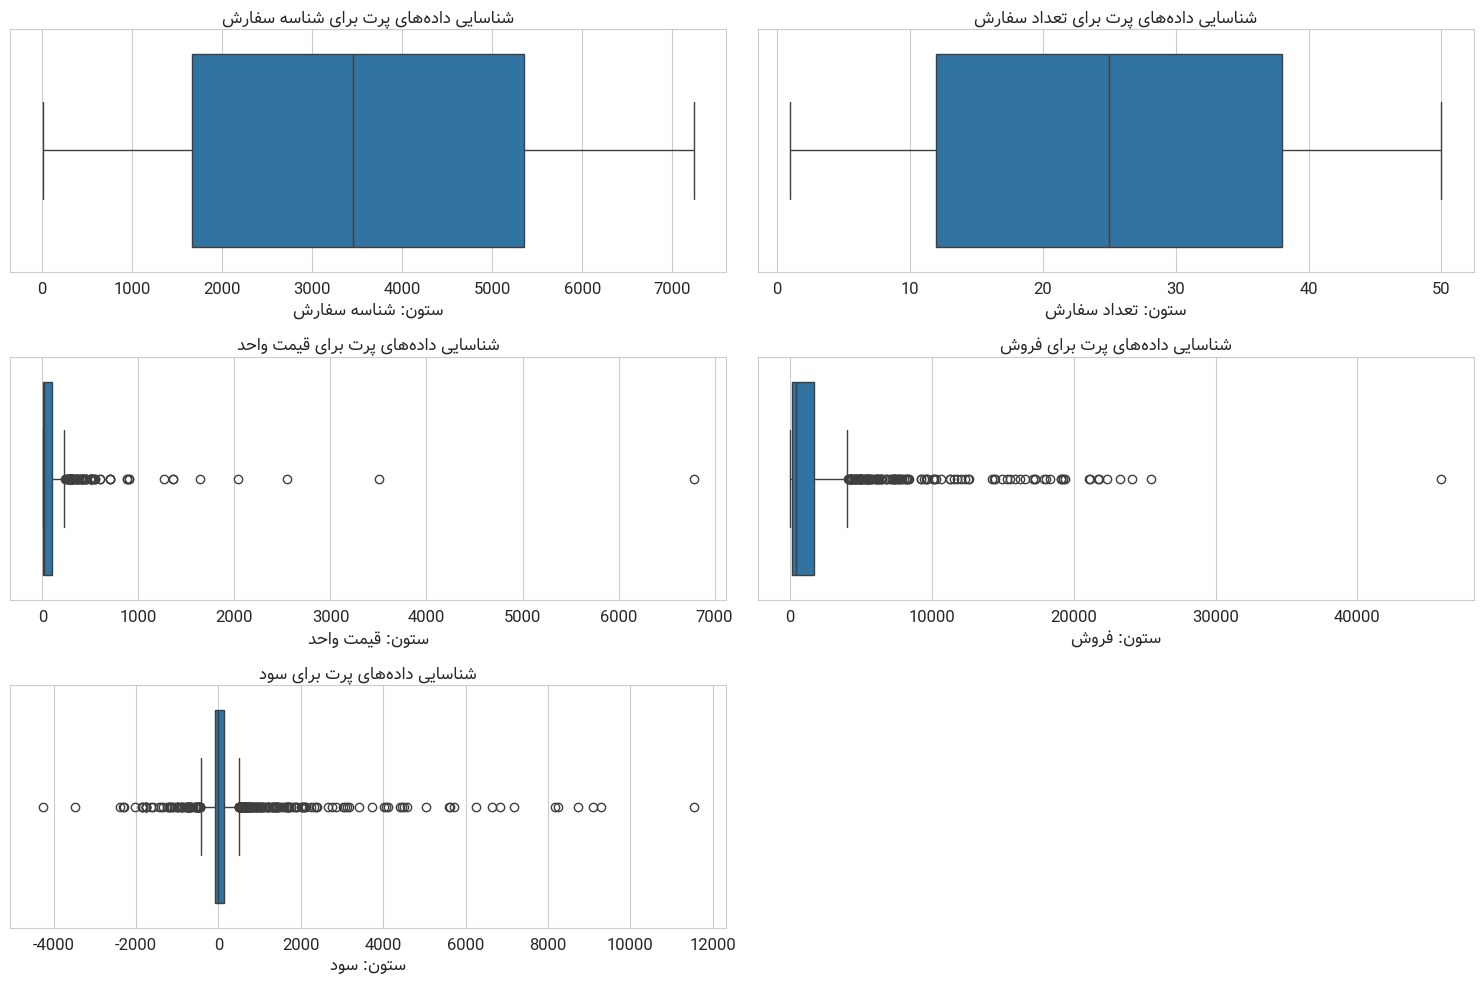

In [215]:

import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
import matplotlib.font_manager as fm
import arabic_reshaper
from bidi.algorithm import get_display

# Check if the DataFrame 'df' exists and is not None before proceeding
if df is not None:
    # Select columns with numeric data types (float64 and int64) for analysis
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Set the figure size for the subplots
    plt.figure(figsize=(15, 10))

    # Calculate the number of rows needed for subplots (2 columns layout)
    rows = (len(numeric_columns) + 1) // 2
    cols = 2

    # Loop through each numeric column to create individual boxplots
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(rows, cols, i)  # Define subplot position
        sns.boxplot(x=df[column])   # Draw boxplot for the current column

        vazir_font = FontProperties(fname=font_path)  # استفاده از مسیر فونت Vazir.ttf

        # Set the plot title with reshaped Persian text and custom font
        plt.title(reshape_farsi(f"شناسایی داده‌های پرت برای {column}"), fontproperties=vazir_font)

        # Set the x-axis label with reshaped Persian text and custom font
        plt.xlabel(reshape_farsi(f"ستون: {column}"), fontproperties=vazir_font)

        # Set font properties for x and y ticks to properly display Persian characters
        plt.xticks(fontproperties=vazir_font)
        plt.yticks(fontproperties=vazir_font)

    # Adjust subplot layout to prevent overlap
    plt.tight_layout()

    # Display all the boxplots
    plt.show()






# 3.2. Z-Score for Outlier Detection in Sales Dataset


 تعداد داده‌های پرت بر اساس Z-Score:
شناسه سفارش: 0
تعداد سفارش: 0
قیمت واحد: 8
فروش: 0
سود: 0

نمونه‌ای از داده‌های پرت شناسایی شده با Z-Score:
     شناسه سفارش تاریخ سفارش  تعداد سفارش     روش ارسال  قیمت واحد  \
225         1444  2009-12-05           13  کامیون تحویل    1360.14   
335         2247  2012-08-01            6  کامیون تحویل    3502.14   
356         2433  2009-08-21           14  کامیون تحویل    2036.48   
441         2912  2012-03-11            7  کامیون تحویل    2550.14   
459         3073  2009-01-07            7    هوایی عادی    6783.02   

           نام مشتری      بخش مشتری دسته‌بندی محصول      فروش        سود  
225     Noel Staavos    کار در منزل        تکنولوژی  15823.27  1759.3400  
335    Clay Cheatham  کسب‌وکار کوچک        تکنولوژی  21134.71 -4266.0885  
356       Cari Sayre          شرکتی        تکنولوژی  24105.87  4073.2500  
441    Tamara Dahlen          شرکتی        تکنولوژی  16587.13 -3476.8593  
459  Jasper Cacioppo    کار در منزل        تکنولوژی  45923

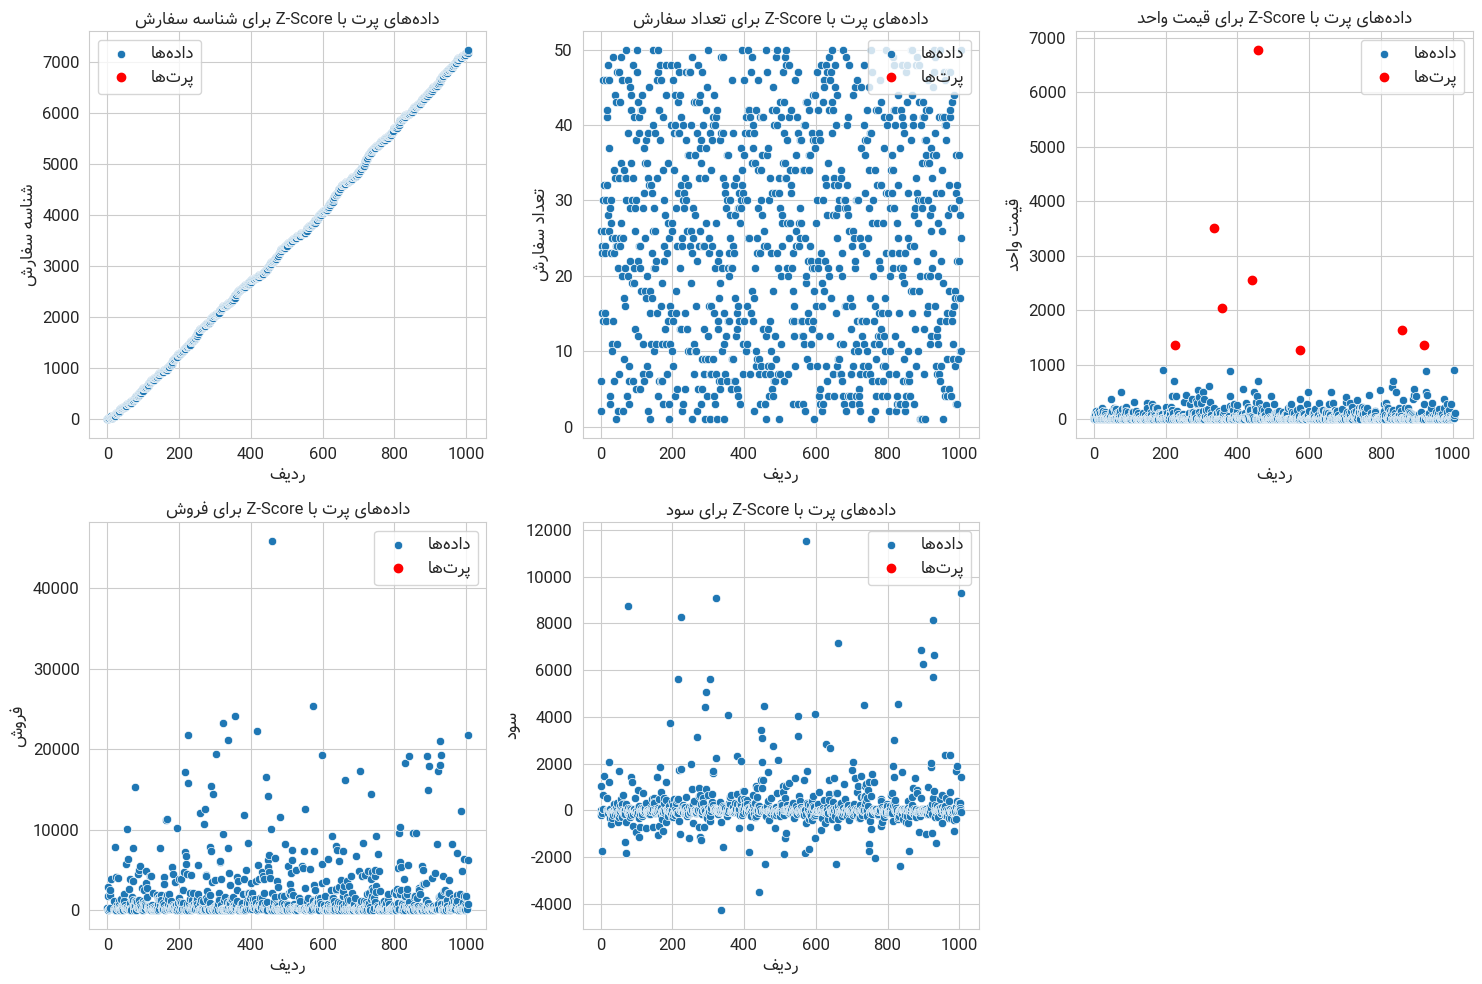

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

# Assert that the DataFrame 'df' and the list of numeric columns 'numeric_columns' are defined
assert 'df' in globals() and 'numeric_columns' in globals(), "دیتافریم یا ستون‌های عددی تعریف نشده‌اند!"

# --- Outlier Analysis with Z-Score ---

# Calculate the Z-scores for each value in the specified numeric columns
z_scores = df[numeric_columns].apply(zscore)

# Define the Z-score threshold for identifying outliers (common value is 3)
threshold = 3

# Create a boolean DataFrame indicating which values are outliers based on the Z-score threshold
outliers = (z_scores.abs() > threshold)

# Extract rows from the original DataFrame that contain at least one outlier in any of the numeric columns
outlier_rows = df[outliers.any(axis=1)]

# Display the number of outliers found in each numeric column
print("\n تعداد داده‌های پرت بر اساس Z-Score:")
for col in numeric_columns:
    num_outliers = outliers[col].sum()  # Count the number of outliers in the current column
    print(f"{col}: {num_outliers}")

# Display a sample of the identified outlier rows
print("\nنمونه‌ای از داده‌های پرت شناسایی شده با Z-Score:")
print(outlier_rows.head())

# --- Visualization of Outliers (Optional) ---

# Create a figure and a set of subplots for visualizing outlier data
import math
cols = 3
rows = math.ceil(len(numeric_columns) / cols)

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(rows, cols, i)  # Add a subplot for each column
    sns.scatterplot(x=range(len(df)), y=df[column], label=reshape_farsi("داده‌ها"))  # Plot all data points
    plt.scatter(outliers.index[outliers[column]], df.loc[outliers[column], column],
                color='red', label=reshape_farsi("پرت‌ها"))  # Highlight outliers in red
    # Set the title of the plot, displaying the column name and outlier identification method
    plt.title(reshape_farsi(f"داده‌های پرت با Z-Score برای {column}"), fontproperties=vazir_font)
    plt.xlabel(reshape_farsi("ردیف"), fontproperties=vazir_font)  # Set the x-axis label
    plt.ylabel(reshape_farsi(f"{column}"), fontproperties=vazir_font)  # Set the y-axis label
    plt.legend(prop=vazir_font)  # Display the legend using the specified font

# Adjust the layout of the subplots to prevent overlapping
plt.tight_layout()
# Show the plots
plt.show()

# 3.3.Outlier Detection Comparison: Z-Score vs Boxplot for Sales and Profit Analysis with Order ID Visualization

Comparing the number of outliers:

🔹 Column تعداد سفارش:
Number of outliers with Z-Score: 0
Number of outliers with Boxplot: 0

🔹 Column قیمت واحد:
Number of outliers with Z-Score: 8
Number of outliers with Boxplot: 81

🔹 Column فروش:
Number of outliers with Z-Score: 0
Number of outliers with Boxplot: 132

🔹 Column سود:
Number of outliers with Z-Score: 0
Number of outliers with Boxplot: 207

Sample of common outliers between both methods:
     شناسه سفارش  تعداد سفارش  قیمت واحد      فروش        سود
225         1444           13    1360.14  15823.27  1759.3400
335         2247            6    3502.14  21134.71 -4266.0885
356         2433           14    2036.48  24105.87  4073.2500
441         2912            7    2550.14  16587.13 -3476.8593
459         3073            7    6783.02  45923.76   102.6100


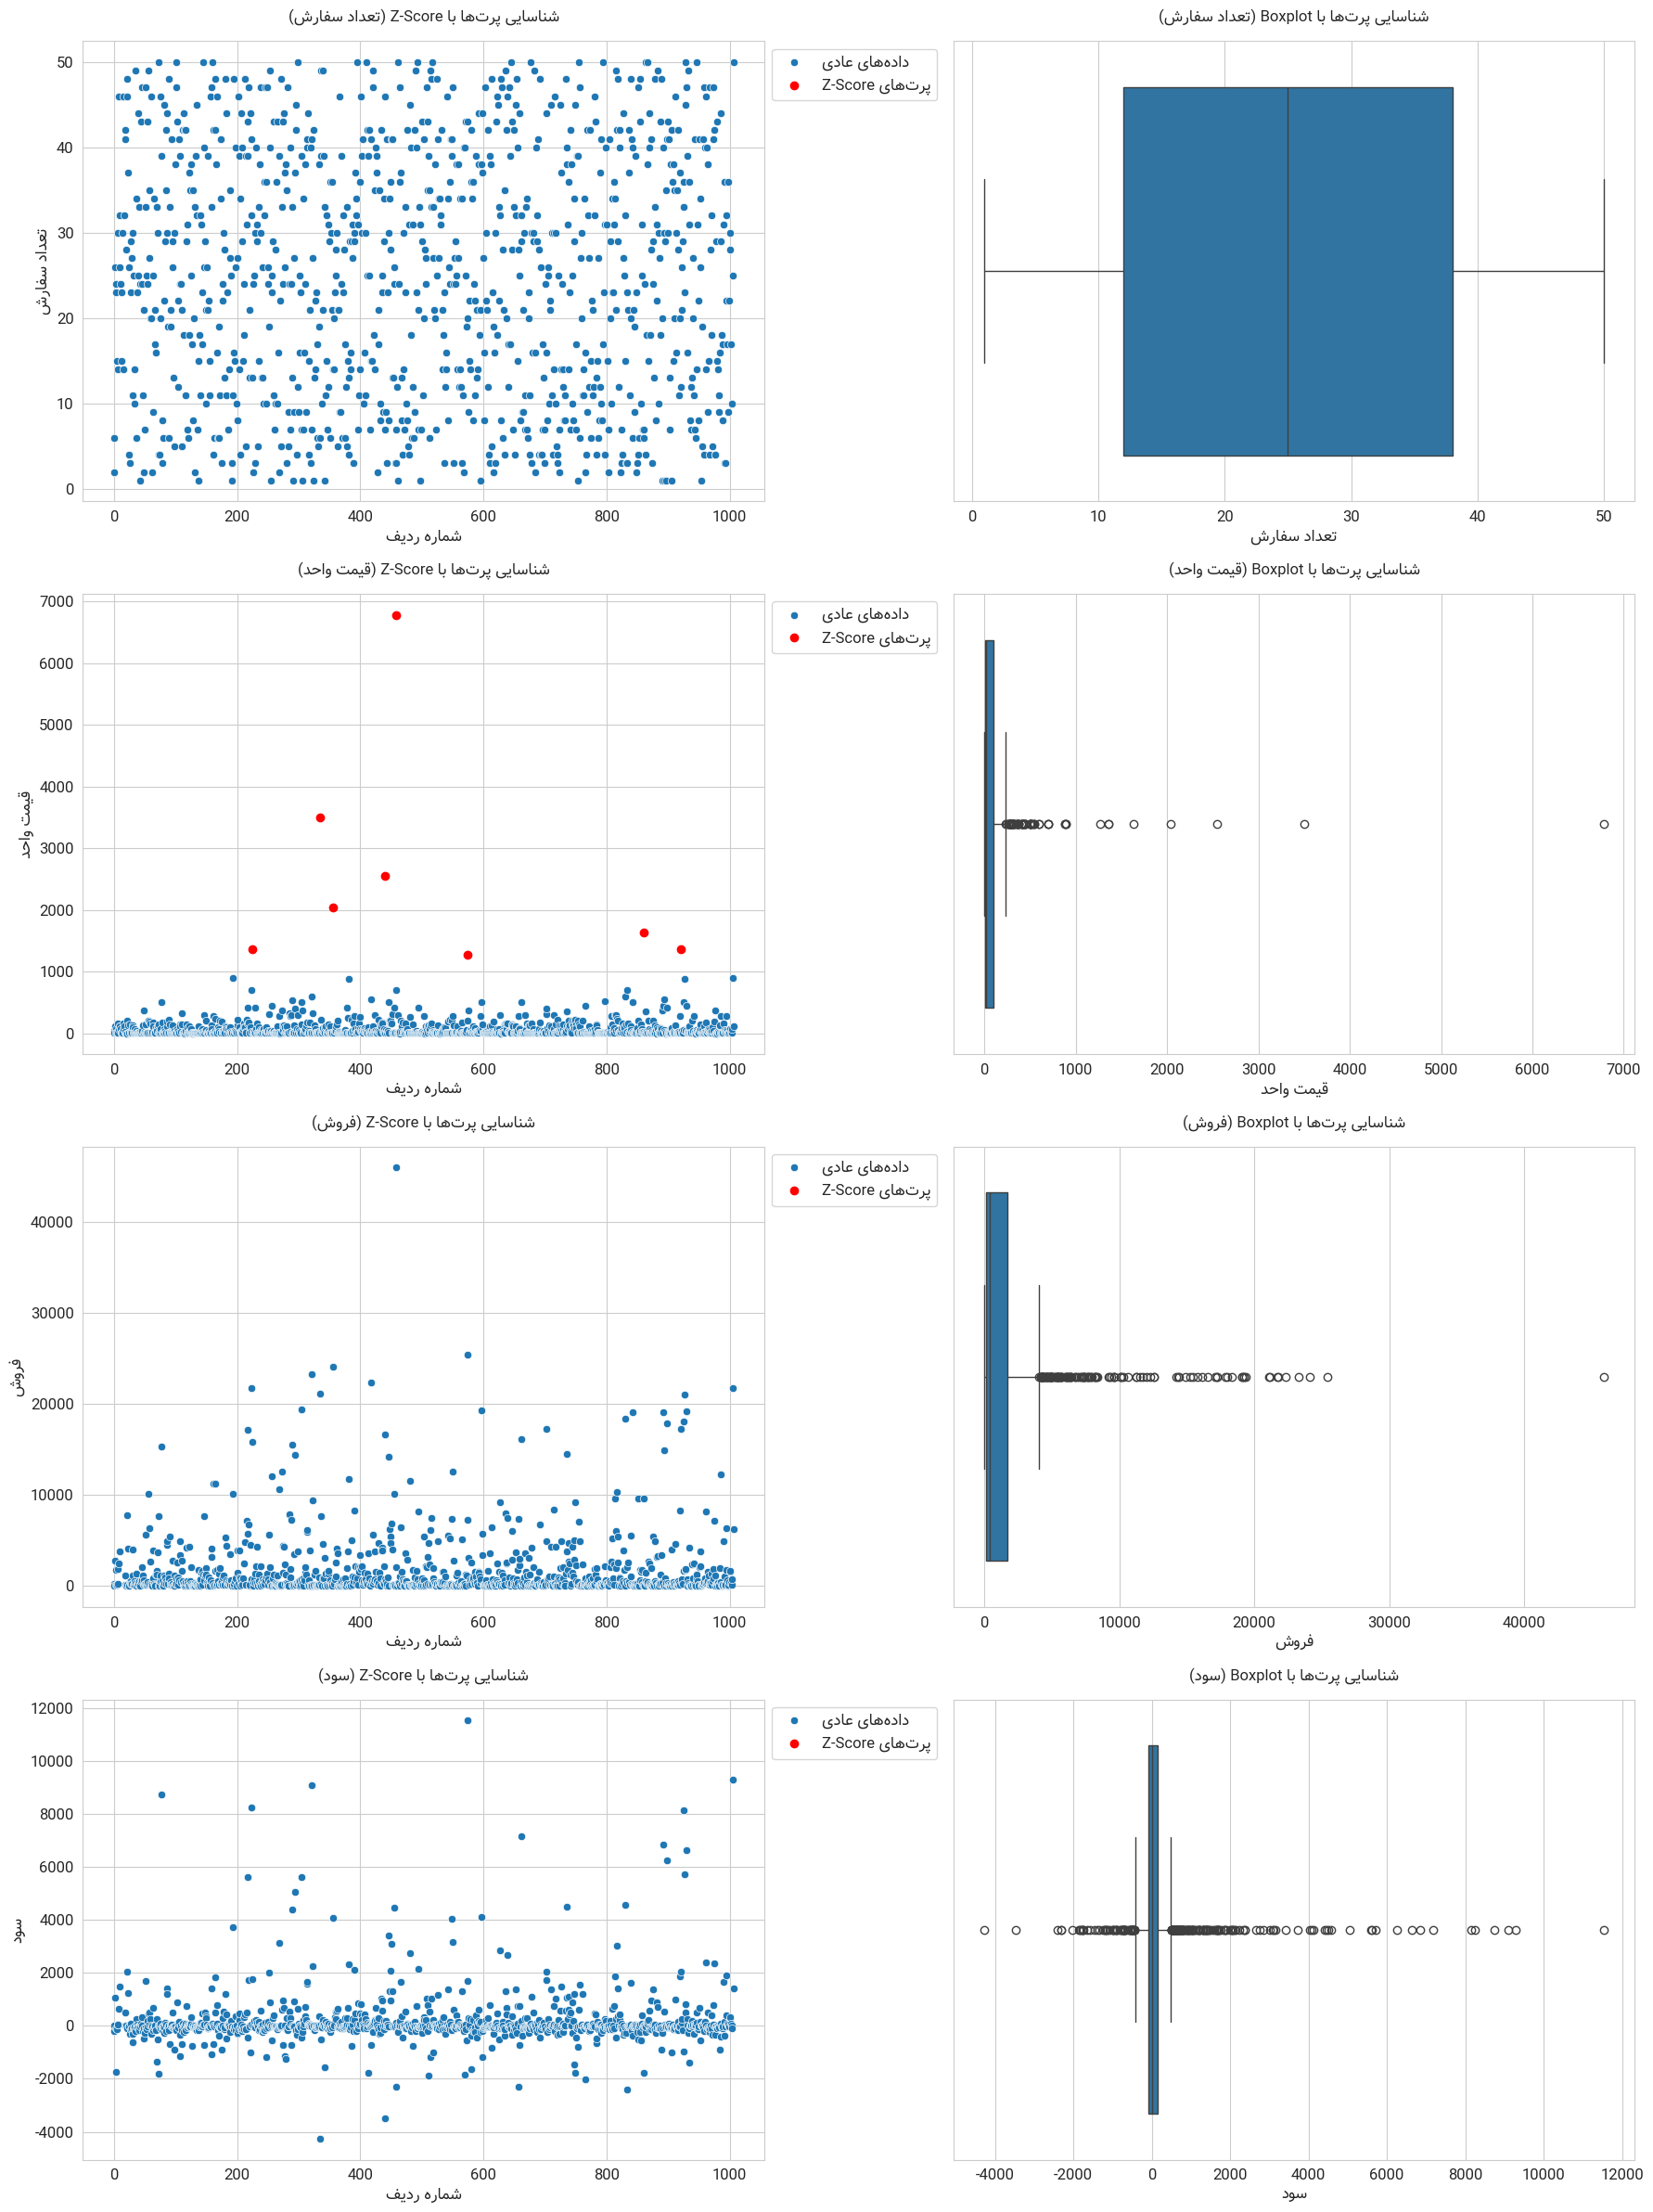

In [217]:
# from scipy.stats import zscore
# import matplotlib.pyplot as plt
# import seaborn as sns

# # --- Setting up font and chart appearance for Persian display ---
# plt.rcParams['font.family'] = 'Vazir'  # Using the Vazir font for Persian text
# plt.rcParams['font.size'] = 12         # Default font size
# plt.rcParams['axes.unicode_minus'] = False  # Correctly display minus signs in numbers

# # --- Helper function to properly display Persian text in charts ---
# def reshape_farsi(text):
#     reshaped = arabic_reshaper.reshape(text)  # Rearranging characters for correct Persian display
#     return get_display(reshaped)              # Returning the text ready for display

# # --- Calculating Z-Scores to identify outliers ---
# z_scores = df[['تعداد سفارش', 'قیمت واحد', 'فروش', 'سود']].apply(zscore)  # Calculating Z-scores for each numerical column
# threshold = 3  # Common threshold for Z-score to identify outliers
# outliers_zscore = (z_scores.abs() > threshold)  # Identifying data points with Z-scores exceeding the threshold

# # --- Identifying outliers using the IQR (Boxplot) method ---
# Q1 = df[['تعداد سفارش', 'قیمت واحد', 'فروش', 'سود']].quantile(0.25)  # First quartile
# Q3 = df[['تعداد سفارش', 'قیمت واحد', 'فروش', 'سود']].quantile(0.75)  # Third quartile
# IQR = Q3 - Q1  # Interquartile range
# # Identifying data points outside the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR] as outliers
# outliers_boxplot = ((df[['تعداد سفارش', 'قیمت واحد', 'فروش', 'سود']] < (Q1 - 1.5 * IQR)) |
#                     (df[['تعداد سفارش', 'قیمت واحد', 'فروش', 'سود']] > (Q3 + 1.5 * IQR)))

# # --- Displaying the number of outliers identified by each method ---
# print("Comparing the number of outliers:")
# for col in ['تعداد سفارش', 'قیمت واحد', 'فروش', 'سود']:
#     print(f"\n🔹 Column {col}:")
#     print(f"Number of outliers with Z-Score: {outliers_zscore[col].sum()}")     # Number of outliers with Z-Score
#     print(f"Number of outliers with Boxplot: {outliers_boxplot[col].sum()}")    # Number of outliers with Boxplot

# # --- Displaying a sample of data points identified as outliers by both methods ---
# print("\nSample of common outliers between both methods:")
# common_outliers = outliers_zscore & outliers_boxplot  # Data points identified as outliers by both methods
# print(df.loc[common_outliers.any(axis=1), ['شناسه سفارش', 'تعداد سفارش', 'قیمت واحد', 'فروش', 'سود']].head())

# # --- Plotting comparative charts for each numerical column ---
# target_columns = ['تعداد سفارش', 'قیمت واحد', 'فروش', 'سود']  # List of target columns

# for col in target_columns:
#     plt.figure(figsize=(18, 6))  # Defining the figure size

#     # --- Subplot 1: Displaying outliers with Z-Score ---
#     plt.subplot(1, 2, 1)
#     sns.scatterplot(x=range(len(df)), y=df[col], label=reshape_farsi("داده‌های عادی"))  # Regular data points
#     plt.scatter(df[outliers_zscore[col]].index, df.loc[outliers_zscore[col], col],
#                 color='red', label=reshape_farsi("پرت‌های Z-Score"))  # Outliers in red
#     plt.title(reshape_farsi(f"Outlier Detection with Z-Score ({col})"),
#               fontsize=14, pad=15, fontproperties=vazir_font)
#     plt.xlabel(reshape_farsi("Row Number"), fontsize=12, fontproperties=vazir_font)
#     plt.ylabel(reshape_farsi(col), fontsize=12, fontproperties=vazir_font)
#     plt.legend(prop=vazir_font, loc='upper left', bbox_to_anchor=(1, 1))

#     # --- Subplot 2: Displaying outliers with Boxplot ---
#     plt.subplot(1, 2, 2)
#     sns.boxplot(x=df[col])  # Drawing a boxplot to display outliers
#     plt.title(reshape_farsi(f"Outlier Detection with Boxplot ({col})"),
#               fontsize=14, pad=15, fontproperties=vazir_font)
#     plt.xlabel(reshape_farsi(col), fontsize=12, fontproperties=vazir_font)
#     plt.xticks(fontproperties=vazir_font)

#     plt.tight_layout()  # Adjusting subplot spacing to prevent overlap
#     plt.show()         # Displaying the chart





from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

# --- Setting up font and chart appearance for Persian display ---
plt.rcParams['font.family'] = 'Vazir'  # Using the Vazir font for Persian text
plt.rcParams['font.size'] = 12         # Default font size
plt.rcParams['axes.unicode_minus'] = False  # Correctly display minus signs in numbers

# --- Helper function to properly display Persian text in charts ---
def reshape_farsi(text):
    reshaped = arabic_reshaper.reshape(text)  # Rearranging characters for correct Persian display
    return get_display(reshaped)              # Returning the text ready for display

# --- Calculating Z-Scores to identify outliers ---
z_scores = df[['تعداد سفارش', 'قیمت واحد', 'فروش', 'سود']].apply(zscore)  # Calculating Z-scores for each numerical column
threshold = 3  # Common threshold for Z-score to identify outliers
outliers_zscore = (z_scores.abs() > threshold)  # Identifying data points with Z-scores exceeding the threshold

# --- Identifying outliers using the IQR (Boxplot) method ---
Q1 = df[['تعداد سفارش', 'قیمت واحد', 'فروش', 'سود']].quantile(0.25)  # First quartile
Q3 = df[['تعداد سفارش', 'قیمت واحد', 'فروش', 'سود']].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range
# Identifying data points outside the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR] as outliers
outliers_boxplot = ((df[['تعداد سفارش', 'قیمت واحد', 'فروش', 'سود']] < (Q1 - 1.5 * IQR)) |
                    (df[['تعداد سفارش', 'قیمت واحد', 'فروش', 'سود']] > (Q3 + 1.5 * IQR)))

# --- Displaying the number of outliers identified by each method ---
print("Comparing the number of outliers:")
for col in ['تعداد سفارش', 'قیمت واحد', 'فروش', 'سود']:
    print(f"\n🔹 Column {col}:")
    print(f"Number of outliers with Z-Score: {outliers_zscore[col].sum()}")     # Number of outliers with Z-Score
    print(f"Number of outliers with Boxplot: {outliers_boxplot[col].sum()}")    # Number of outliers with Boxplot

# --- Displaying a sample of data points identified as outliers by both methods ---
print("\nSample of common outliers between both methods:")
common_outliers = outliers_zscore & outliers_boxplot  # Data points identified as outliers by both methods
print(df.loc[common_outliers.any(axis=1), ['شناسه سفارش', 'تعداد سفارش', 'قیمت واحد', 'فروش', 'سود']].head())

# --- Plotting comparative charts for each numerical column in one figure ---
target_columns = ['تعداد سفارش', 'قیمت واحد', 'فروش', 'سود']  # List of target columns

num_rows = len(target_columns)  # Number of rows = number of columns to plot
num_cols = 2  # Two columns: Z-Score plot and Boxplot

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows))

for i, col in enumerate(target_columns):
    # --- Subplot 1: Displaying outliers with Z-Score ---
    ax1 = axes[i, 0]
    sns.scatterplot(x=range(len(df)), y=df[col], ax=ax1, label=reshape_farsi("داده‌های عادی"))
    ax1.scatter(df[outliers_zscore[col]].index, df.loc[outliers_zscore[col], col],
                color='red', label=reshape_farsi("پرت‌های Z-Score"))
    ax1.set_title(reshape_farsi(f"شناسایی پرت‌ها با Z-Score ({col})"),
                  fontsize=14, pad=15, fontproperties=vazir_font)
    ax1.set_xlabel(reshape_farsi("شماره ردیف"), fontsize=12, fontproperties=vazir_font)
    ax1.set_ylabel(reshape_farsi(col), fontsize=12, fontproperties=vazir_font)
    ax1.legend(prop=vazir_font, loc='upper left', bbox_to_anchor=(1, 1))

    # --- Subplot 2: Displaying outliers with Boxplot ---
    ax2 = axes[i, 1]
    sns.boxplot(x=df[col], ax=ax2)
    ax2.set_title(reshape_farsi(f"شناسایی پرت‌ها با Boxplot ({col})"),
                  fontsize=14, pad=15, fontproperties=vazir_font)
    ax2.set_xlabel(reshape_farsi(col), fontsize=12, fontproperties=vazir_font)
    ax2.tick_params(axis='x', labelsize=12)

plt.tight_layout()  # Adjust spacing to prevent overlap
plt.savefig('outlier_analysis.png', bbox_inches='tight', dpi=300)  # Save the entire figure with all subplots
plt.show()

# 4.EDA (Exploratory Data Analysis)

# 4.1.Distribution Analysis of Numerical Data Using Histogram and KDE Plots

>



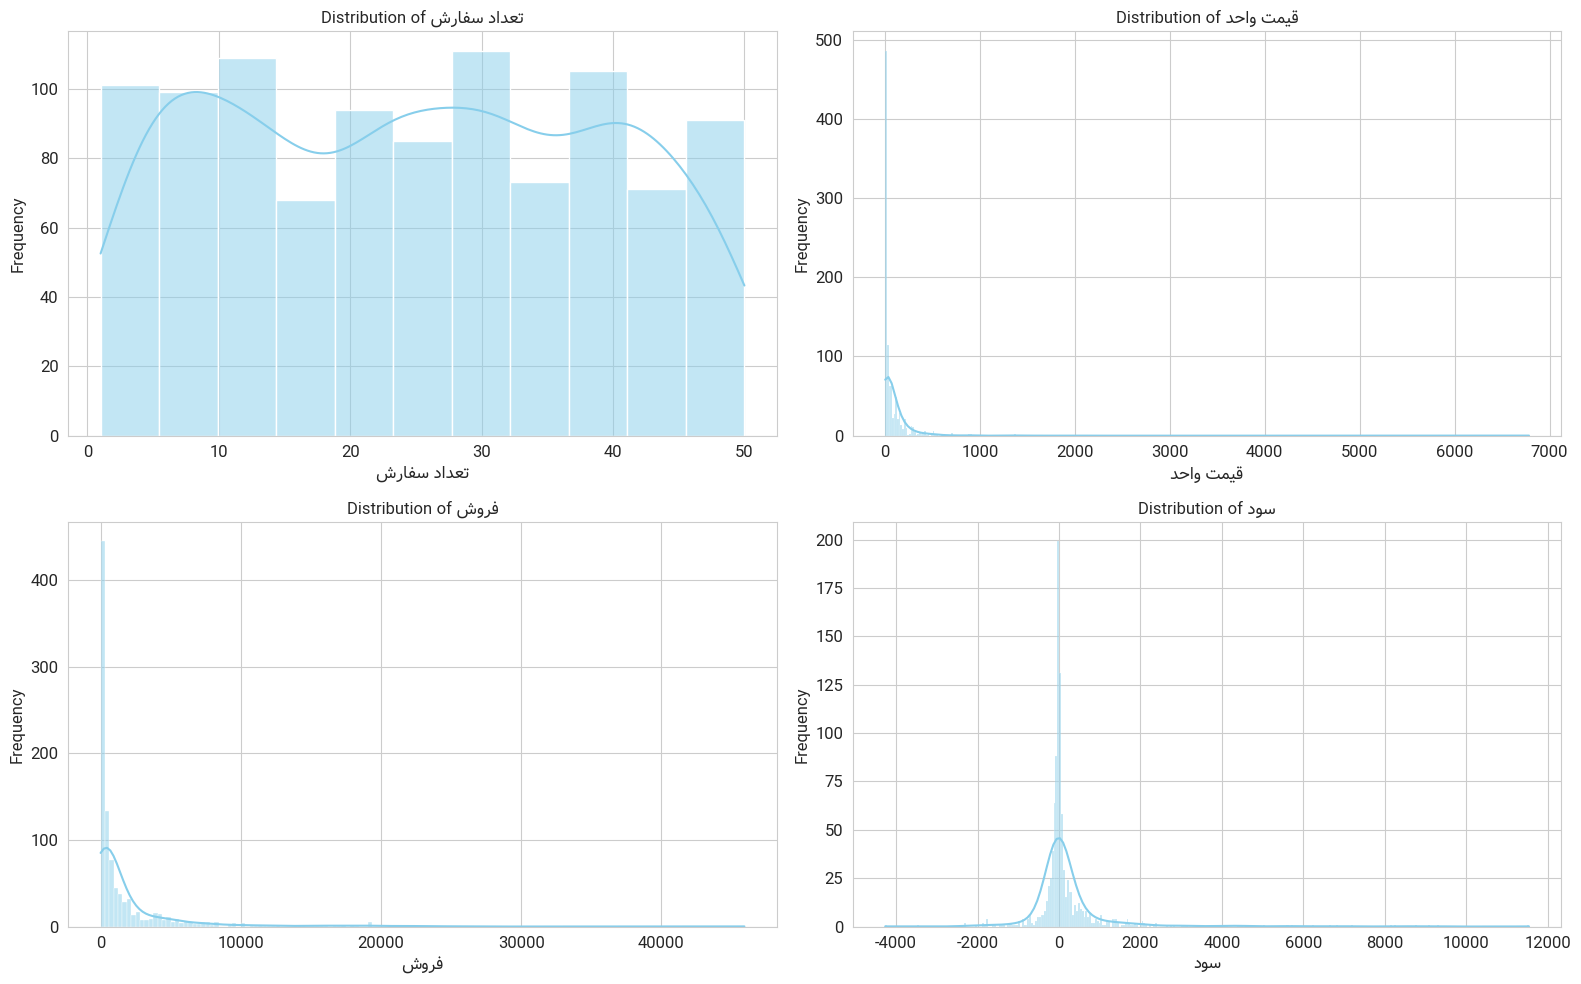

In [218]:
plt.figure(figsize=(16, 10))  # Create a new figure with specified size (width=16, height=10)
numeric_columns = ['تعداد سفارش', 'قیمت واحد', 'فروش', 'سود']  # List of numeric columns to plot

# Loop through each numeric column and create a subplot for its distribution
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots and select the i-th subplot
    sns.histplot(df[col], kde=True, color='skyblue')  # Plot histogram with KDE (kernel density estimate) overlay
    plt.title(reshape_farsi(f'Distribution of {col}'), fontproperties=vazir_font)  # Set the title with Persian text reshaped
    plt.xlabel(reshape_farsi(col), fontproperties=vazir_font)  # Set x-axis label with Persian text reshaped
    plt.ylabel(reshape_farsi('Frequency'), fontproperties=vazir_font)  # Set y-axis label with Persian text reshaped
    plt.xticks(fontproperties=vazir_font)  # Set x-axis tick labels font to Vazir for Persian support

plt.tight_layout()  # Adjust subplots to prevent overlap
plt.show()  # Display the figure with all subplots



# 4.2.Box Plot Visualization for Numerical Feature Distribution Analysis

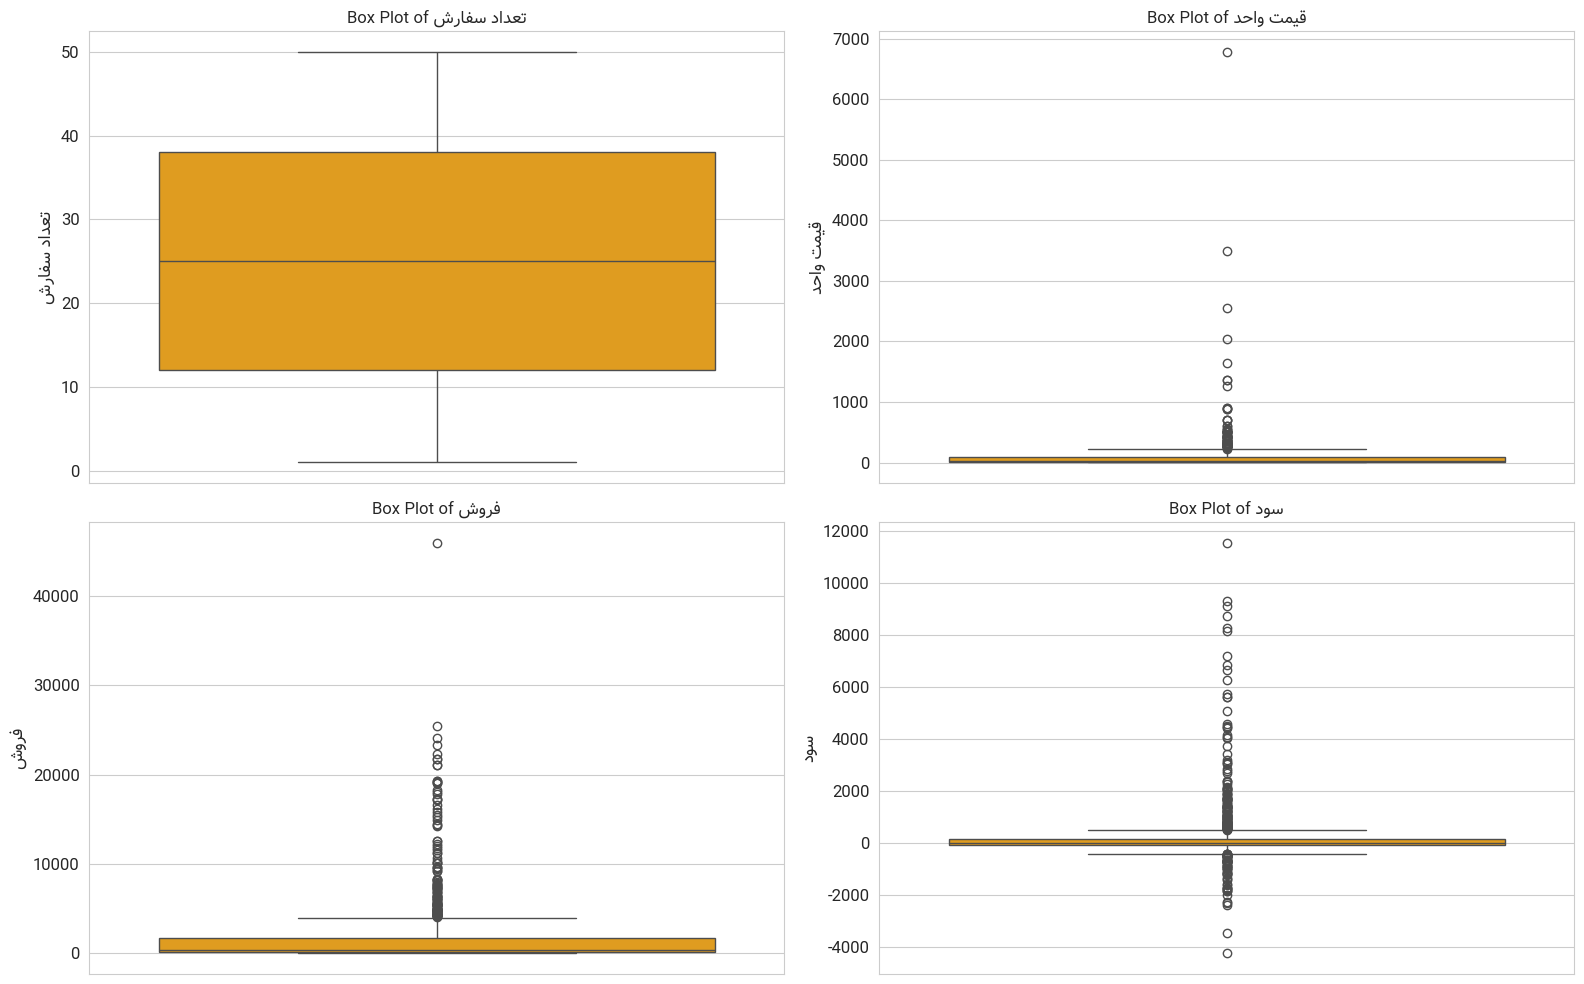

In [219]:
plt.figure(figsize=(16, 10))  # Create a new figure with specified dimensions (width=16, height=10 inches)

# Loop through each column in numeric_columns and create a boxplot for each one
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots and select the i-th position
    sns.boxplot(y=df[col], color='orange')  # Create a vertical boxplot with orange color
    plt.title(reshape_farsi(f'Box Plot of {col}'), fontproperties=vazir_font)  # Set the title with Persian text
    plt.ylabel(reshape_farsi(col), fontproperties=vazir_font)  # Set the y-axis label with Persian text
    plt.yticks(fontproperties=vazir_font)  # Apply Vazir font to y-axis tick labels for Persian support

plt.tight_layout()  # Adjust the spacing between subplots to prevent overlap
plt.show()  # Display the figure with all subplots

# 4.3.تحلیل روابط بین ویژگی‌ها

> Add blockquote



# Correlation Matrix of Numerical Variables

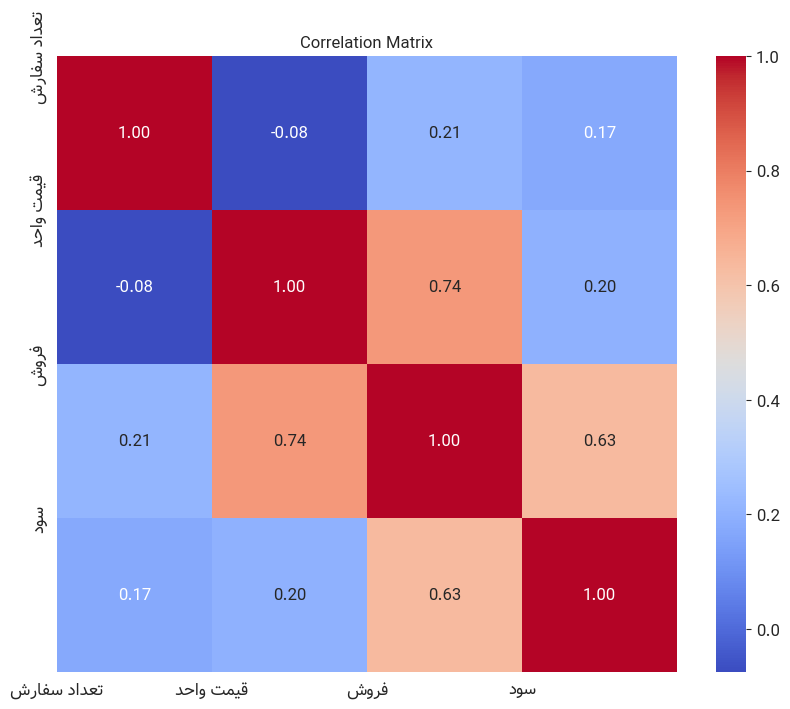

In [220]:
corr_matrix = df[numeric_columns].corr()  # Calculate the correlation matrix for the specified numeric columns

plt.figure(figsize=(10, 8))  # Create a new figure with a specific size (width=10, height=8 inches)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',  # Create a heatmap of the correlation matrix
            annot_kws={'fontproperties': vazir_font})  # Use the Vazir font for annotations
# annot=True: Display correlation values in the heatmap cells
# cmap='coolwarm': Use the 'coolwarm' colormap (blue for negative, red for positive correlations)
# fmt='.2f': Format the correlation values to two decimal places

plt.title(reshape_farsi('Correlation Matrix'), fontproperties=vazir_font)  # Set the title with Persian text
plt.xticks(ticks=range(len(numeric_columns)),  # Set the x-axis tick positions
           labels=[reshape_farsi(col) for col in numeric_columns],  # Set the x-axis tick labels with Persian text
           fontproperties=vazir_font)  # Use the Vazir font for x-axis labels
plt.yticks(ticks=range(len(numeric_columns)),  # Set the y-axis tick positions
           labels=[reshape_farsi(col) for col in numeric_columns],  # Set the y-axis tick labels with Persian text
           fontproperties=vazir_font)  # Use the Vazir font for y-axis labels

plt.show()  # Display the heatmap



# 4.4.Pairwise Scatter Plots of Numerical Features




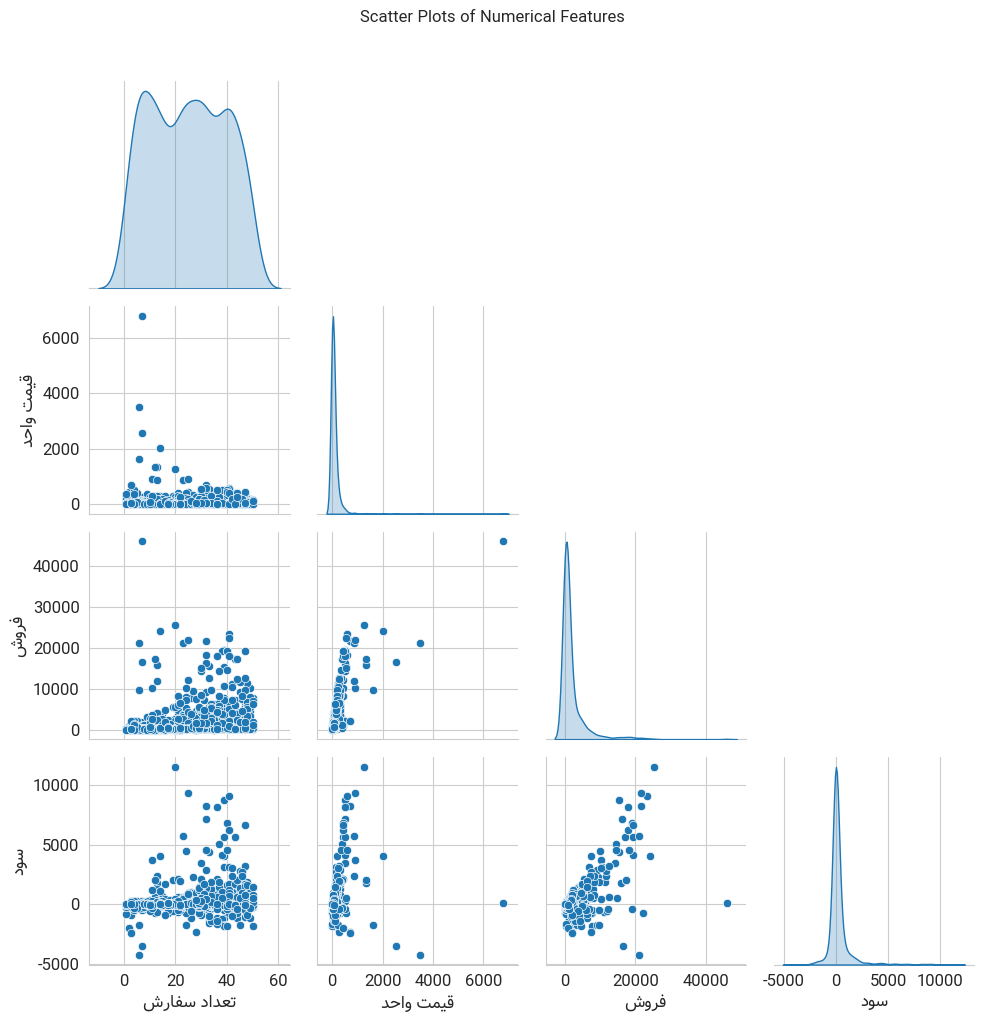

In [221]:
import seaborn as sns  # Import the Seaborn library for enhanced data visualization

g = sns.pairplot(df[numeric_columns], diag_kind='kde', corner=True)  # Create a pairplot to visualize relationships between numeric columns
# df[numeric_columns]: Select the DataFrame with the numeric columns
# diag_kind='kde': Display Kernel Density Estimate plots on the diagonal
# corner=True: Only display the lower triangle of the pairplot

plt.suptitle(reshape_farsi('Scatter Plots of Numerical Features'), y=1.02, fontproperties=vazir_font)  # Set a suptitle for the entire pairplot
# y=1.02: Adjust the vertical position of the suptitle
# reshape_farsi: A function to reshape Persian text for correct display
# fontproperties=vazir_font: Use the specified font for the title

# Loop through each subplot in the pairplot to format labels and fonts
for ax in g.axes.flatten():
    if ax is not None:  # Check if the subplot exists
        xlabel = ax.get_xlabel()  # Get the x-axis label
        if xlabel:
            ax.set_xlabel(reshape_farsi(xlabel), fontproperties=vazir_font)  # Reshape and set the x-axis label with the Vazir font
        ylabel = ax.get_ylabel()  # Get the y-axis label
        if ylabel:
            ax.set_ylabel(reshape_farsi(ylabel), fontproperties=vazir_font)  # Reshape and set the y-axis label with the Vazir font
        for label in ax.get_xticklabels():  # Loop through each x-axis tick label
            label.set_fontproperties(vazir_font)  # Set the font for x-axis tick labels to Vazir
        for label in ax.get_yticklabels():  # Loop through each y-axis tick label
            label.set_fontproperties(vazir_font)  # Set the font for y-axis tick labels to Vazir

plt.tight_layout()  # Adjust the subplots to prevent overlapping
plt.show()  # Display the pairplot



#Joint Distribution and Relationship between Sales and Profit

<Figure size 1000x600 with 0 Axes>

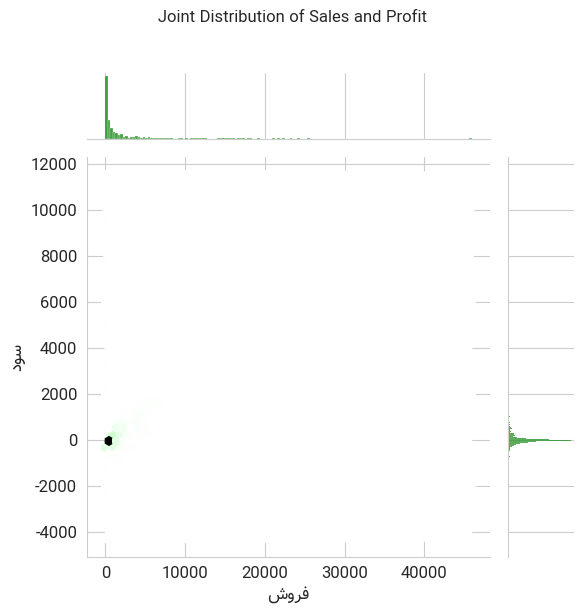

In [222]:
plt.figure(figsize=(10, 6))  # Create a new figure with a specified size (width=10, height=6 inches)
sns.jointplot(x=df['فروش'], y=df['سود'], kind='hex', color='green')  # Create a joint plot to visualize the relationship between 'فروش' (sales) and 'سود' (profit)
# x=df['فروش']: Specify 'فروش' as the x-axis variable
# y=df['سود']: Specify 'سود' as the y-axis variable
# kind='hex': Use a hexbin plot to represent the joint distribution
# color='green': Set the color of the hexbins to green

plt.suptitle(reshape_farsi('Joint Distribution of Sales and Profit'),  # Set the suptitle for the plot
             y=1.02, fontproperties=vazir_font)  # Adjust the vertical position of the suptitle and set the font to Vazir

plt.xlabel(reshape_farsi('فروش'), fontproperties=vazir_font)  # Set the x-axis label to 'فروش' (sales) and set the font to Vazir
plt.ylabel(reshape_farsi('سود'), fontproperties=vazir_font)  # Set the y-axis label to 'سود' (profit) and set the font to Vazir

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()  # Display the plot



# 3.Data Preparation

#3.1.Summary of Missing Values in Each Data Column




In [223]:
import pandas as pd  # Import the pandas library for data manipulation

# Display the number of missing values in each column
missing_counts = df.isnull().sum()  # Calculate the sum of null values for each column

# Display the percentage of missing values in each column
missing_percent = (df.isnull().mean() * 100).round(2)  # Calculate the mean of null values (as a proportion), multiply by 100 to get percentage, and round to 2 decimal places

# Combine the results into a DataFrame for better presentation
missing_summary = pd.DataFrame({  # Create a new DataFrame
    'Missing Count': missing_counts,  # Assign the missing counts to a column named 'Missing Count'
    'Missing Percent (%)': missing_percent  # Assign the missing percentages to a column named 'Missing Percent (%)'
})

print(missing_summary)  # Print the summary DataFrame


                 Missing Count  Missing Percent (%)
شناسه سفارش                  0                 0.00
تاریخ سفارش                  0                 0.00
تعداد سفارش                  0                 0.00
روش ارسال                    0                 0.00
قیمت واحد                    0                 0.00
نام مشتری                    0                 0.00
بخش مشتری                    0                 0.00
دسته‌بندی محصول              0                 0.00
فروش                         8                 0.79
سود                          8                 0.79


#3.2.Outlier Detection in Sales and Profit Using Boxplots and Statistical Summary



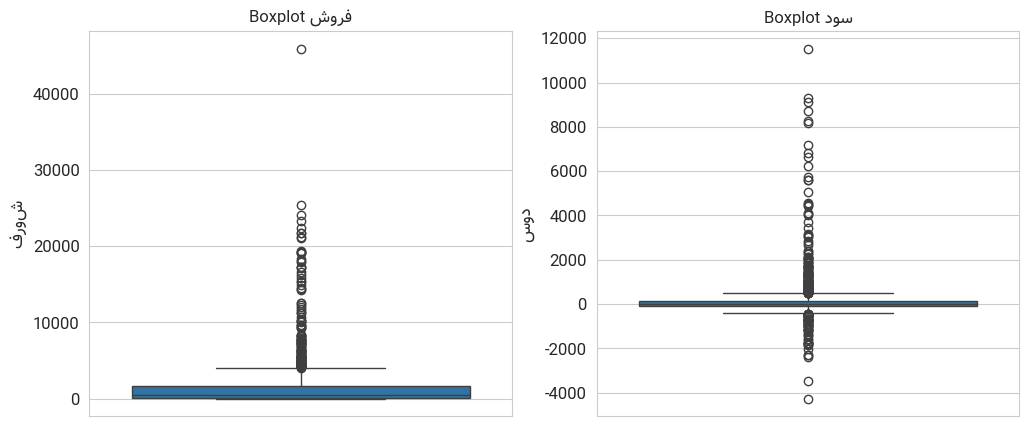

               فروش           سود
count    999.000000    999.000000
mean    1869.035668    216.914564
std     3851.570257   1135.726341
min        2.240000  -4266.088500
25%      132.465000    -83.495000
50%      412.620000     -1.250000
75%     1695.515000    146.608000
max    45923.760000  11535.282000


In [224]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns  # Import seaborn for advanced visualization

# Create boxplots to identify outliers
plt.figure(figsize=(12, 5))  # Set the figure size to 12x5 inches

plt.subplot(1, 2, 1)  # Create the first subplot (1 row, 2 columns, first plot)
sns.boxplot(df['فروش'])  # Create a boxplot of the 'فروش' (sales) column
plt.title(reshape_farsi('Boxplot فروش'), fontproperties=vazir_font)  # Set the title of the plot with Persian text and Vazir font

plt.subplot(1, 2, 2)  # Create the second subplot (1 row, 2 columns, second plot)
sns.boxplot(df['سود'])  # Create a boxplot of the 'سود' (profit) column
plt.title(reshape_farsi('Boxplot سود'), fontproperties=vazir_font)  # Set the title of the plot with Persian text and Vazir font

plt.show()  # Display the plots

# Show descriptive statistics for 'فروش' and 'سود'
print(df[['فروش', 'سود']].describe())  # Calculate and print descriptive statistics (count, mean, std, min, max, quartiles) for the 'فروش' and 'سود' columns

#3.3.Imputing Missing Values with Median in Sales and Profit Columns

In [225]:
# Fill missing values in the 'فروش' (Sales) column with the median of that column
df['فروش'] = df['فروش'].fillna(df['فروش'].median())

# Fill missing values in the 'سود' (Profit) column with the median of that column
df['سود'] = df['سود'].fillna(df['سود'].median())

#3.4.Median Imputation of Missing Values and Verification


In [226]:
# Create a copy of the original DataFrame to preserve the original data
df_cleaned = df.copy()

# Replace missing values in 'فروش' (Sales) column with the median of that column
df_cleaned['فروش'] = df_cleaned['فروش'].fillna(df_cleaned['فروش'].median())

# Replace missing values in 'سود' (Profit) column with the median of that column
df_cleaned['سود'] = df_cleaned['سود'].fillna(df_cleaned['سود'].median())

# Check the number of missing values in 'فروش' and 'سود' columns after imputation
missing_after = df_cleaned[['فروش', 'سود']].isnull().sum()

# Print the count of missing values after replacement
print("Number of missing values after imputation:")
print(missing_after)

Number of missing values after imputation:
فروش    0
سود     0
dtype: int64


# 3.5.Converting the Order Date Column to Datetime Format

In [227]:
import pandas as pd

# Convert the 'تاریخ سفارش' (Order Date) column to datetime format
df_cleaned['تاریخ سفارش'] = pd.to_datetime(df_cleaned['تاریخ سفارش'], errors='coerce')

# Check the data type of the column after conversion
print(df_cleaned['تاریخ سفارش'].dtype)


datetime64[ns]


#3.6.Hybrid Encoding of Categorical Data Using Label Encoding and One-Hot Encoding

In [228]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. Create a copy of the original cleaned dataset
df_encoded = df_cleaned.copy()

# 2. Get a list of all categorical columns (object and category types)
categorical_columns = df_encoded.select_dtypes(include=['object', 'category']).columns.tolist()

# 3. Apply Label Encoding to columns with many categories (e.g., 'نام مشتری' - Customer Name)
label_encode_cols = ['نام مشتری']  # List of columns to apply Label Encoding
for col in label_encode_cols:
    if col in categorical_columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        categorical_columns.remove(col)  # Remove from One-Hot Encoding list

# 4. Apply One-Hot Encoding to the remaining categorical columns
df_encoded = pd.get_dummies(
    df_encoded,
    columns=categorical_columns,
    drop_first=True,  # Drop first category to avoid multicollinearity
    prefix=categorical_columns  # Automatically add prefix based on column names
)

# 5. Display the final encoded dataset and its structure
print("\nFinal dataset after Hybrid Encoding:")
print(df_encoded.head(5))

print("\nData structure information after encoding:")
df_encoded.info()

print(f"\nOriginal dataset dimensions: {df_cleaned.shape}")
print(f"Dataset dimensions after encoding: {df_encoded.shape}")



Final dataset after Hybrid Encoding:
   شناسه سفارش تاریخ سفارش  تعداد سفارش  قیمت واحد  نام مشتری       فروش  \
0            3  2010-10-13            6      38.94        289   261.5400   
1            6  2012-02-20            2       2.08        352     6.9300   
2           32  2011-07-15           26     107.53        247  2808.0800   
3           32  2011-07-15           24      70.89        247  1761.4000   
4           32  2011-07-15           23       7.99        247   160.2335   

        سود  روش ارسال_هوایی عادی  روش ارسال_کامیون تحویل  \
0  -213.250                  True                   False   
1    -4.640                  True                   False   
2  1054.820                  True                   False   
3 -1748.560                 False                    True   
4   -85.129                  True                   False   

   بخش مشتری_مصرف‌کننده  بخش مشتری_کار در منزل  بخش مشتری_کسب‌وکار کوچک  \
0                 False                  False                 

#4.Normalization
#4.1.Standardizing Numerical Data Using StandardScaler

In [229]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Select numerical columns from the dataframe
numerical_cols = df.select_dtypes(include=['number']).columns

# Apply standard scaling (mean=0, std=1) to numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Print the mean of scaled numerical columns (should be close to 0)
print(df[numerical_cols].mean())

# Print the standard deviation of scaled numerical columns (should be close to 1)
print(df[numerical_cols].std())



شناسه سفارش    1.128966e-16
تعداد سفارش   -5.115625e-17
قیمت واحد     -2.822414e-17
فروش          -5.292026e-18
سود           -1.764009e-17
dtype: float64
شناسه سفارش    1.000497
تعداد سفارش    1.000497
قیمت واحد      1.000497
فروش           1.000497
سود            1.000497
dtype: float64


# 4.2.Splitting Data into Training and Testing Sets Using train_test_split

In [230]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('فروش', axis=1)  # Features: all columns except 'فروش' (Sales)
y = df['فروش']               # Target: 'فروش' (Sales) column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print the shape of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Print the data types of the resulting datasets
print("X_train type:", type(X_train))
print("X_test type:", type(X_test))
print("y_train type:", type(y_train))
print("y_test type:", type(y_test))

# Display the first few rows of each dataset
print("X_train head:")
print(X_train.head())
print("X_test head:")
print(X_test.head())
print("y_train head:")
print(y_train.head())
print("y_test head:")
print(y_test.head())

X_train shape: (805, 9)
X_test shape: (202, 9)
y_train shape: (805,)
y_test shape: (202,)
X_train type: <class 'pandas.core.frame.DataFrame'>
X_test type: <class 'pandas.core.frame.DataFrame'>
y_train type: <class 'pandas.core.series.Series'>
y_test type: <class 'pandas.core.series.Series'>
X_train head:
     شناسه سفارش تاریخ سفارش  تعداد سفارش     روش ارسال  قیمت واحد  \
29     -1.579742  2010-06-10     0.150959    هوایی عادی  -0.282401   
280    -0.750913  2010-10-30     0.708050    هوایی عادی  -0.294000   
507    -0.008932  2011-10-02     0.150959    هوایی عادی  -0.289218   
652     0.505546  2009-12-28     0.499141  کامیون تحویل   0.097457   
947     1.578399  2009-07-21     1.752594    هوایی عادی  -0.224880   

         نام مشتری      بخش مشتری دسته‌بندی محصول       سود  
29      Emily Phan     مصرف‌کننده        تکنولوژی -0.266516  
280  Kean Thornton          شرکتی     لوازم اداری -0.291754  
507   Steve Nguyen     مصرف‌کننده     لوازم اداری -0.274434  
652  Gary Zandusky    کار

# 5.Linear Regression Modeling and Performance Evaluation with Multiple Metrics

In [231]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np  # Import numpy

# Assuming df_encoded is your final preprocessed DataFrame

# Separate the features (X) and the target variable (y)
X = df_encoded.drop('فروش', axis=1)  # Drop the target column 'فروش' from features
y = df_encoded['فروش']                # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns in the features
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

# Apply One-Hot Encoding to categorical columns in both training and testing sets
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Convert 'تاریخ سفارش' (Order Date) from datetime to numerical timestamp format (seconds since epoch)
X_train['تاریخ سفارش'] = X_train['تاریخ سفارش'].astype('int64') // 10**9
X_test['تاریخ سفارش'] = X_test['تاریخ سفارش'].astype('int64') // 10**9

# Initialize the Linear Regression model
model_lr = LinearRegression()

# Train the linear regression model on the training data
model_lr.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred_lr = model_lr.predict(X_test)

# Add the predicted values as a new column in the test DataFrame for comparison
X_test['Linear Regression'] = y_pred_lr

# Calculate evaluation metrics to assess model performance
mse_lr = mean_squared_error(y_test, y_pred_lr)                      # Mean Squared Error
rmse_lr = np.sqrt(mse_lr)                                           # Root Mean Squared Error
r2_lr = r2_score(y_test, y_pred_lr)                                 # R-squared score
mae_lr = mean_absolute_error(y_test, y_pred_lr)                     # Mean Absolute Error
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)        # Mean Absolute Percentage Error

# Print the evaluation metrics
print("Linear Regression - MSE:", mse_lr)
print("Linear Regression - RMSE:", rmse_lr)
print("Linear Regression - R-squared:", r2_lr)
print("Linear Regression - MAE:", mae_lr)
print("Linear Regression - MAPE:", mape_lr)

# Display the first few rows of the test set with predictions
print(X_test.head())


Linear Regression - MSE: 839712.2574844349
Linear Regression - RMSE: 916.358149134079
Linear Regression - R-squared: 0.9359050201963718
Linear Regression - MAE: 628.59228320911
Linear Regression - MAPE: 2.8804631081453085
     شناسه سفارش  تاریخ سفارش  تعداد سفارش  قیمت واحد  نام مشتری        سود  \
927         6625   1281830400           23     880.98        351  5713.5300   
630         4321   1247788800           47      30.53        314   -54.6300   
682         4708   1254268800           29       6.48        282  -119.3200   
514         3492   1258934400           49     130.98        351 -1195.1200   
365         2503   1276905600           21       4.13        259   -71.5415   

     روش ارسال_هوایی عادی  روش ارسال_کامیون تحویل  بخش مشتری_مصرف‌کننده  \
927                 False                    True                 False   
630                 False                   False                 False   
682                  True                   False                 False   
514

# 6.Sales Prediction Modeling Using Decision Tree Regressor: Implementation and Evaluation

In [232]:
# Import required libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np  # For numerical operations

# Assuming df_encoded is your final preprocessed DataFrame

# Separate features (X) and target (y)
X = df_encoded.drop('فروش', axis=1)  # Features (exclude target column)
y = df_encoded['فروش']  # Target variable (sales)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns (object type)
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

# Apply one-hot encoding to categorical variables
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Convert order date to Unix timestamp (seconds since epoch)
X_train['تاریخ سفارش'] = X_train['تاریخ سفارش'].astype('int64') // 10**9
X_test['تاریخ سفارش'] = X_test['تاریخ سفارش'].astype('int64') // 10**9

# Initialize Decision Tree Regressor
model_dt = DecisionTreeRegressor()

# Train the model on training data
model_dt.fit(X_train, y_train)

# Generate predictions on test set
y_pred_dt = model_dt.predict(X_test)

# Add predictions to test DataFrame
X_test['Decision Tree'] = y_pred_dt

# Calculate evaluation metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)  # Root Mean Squared Error
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)

# Print performance metrics
print("Decision Tree - MSE:", mse_dt)
print("Decision Tree - RMSE:", rmse_dt)
print("Decision Tree - R-squared:", r2_dt)
print("Decision Tree - MAE:", mae_dt)
print("Decision Tree - MAPE:", mape_dt)

# Display first few rows of test data with predictions
print(X_test.head())


Decision Tree - MSE: 847236.8477009219
Decision Tree - RMSE: 920.4546961697365
Decision Tree - R-squared: 0.9353306705264013
Decision Tree - MAE: 319.1380915841584
Decision Tree - MAPE: 0.20405045812508343
     شناسه سفارش  تاریخ سفارش  تعداد سفارش  قیمت واحد  نام مشتری        سود  \
927         6625   1281830400           23     880.98        351  5713.5300   
630         4321   1247788800           47      30.53        314   -54.6300   
682         4708   1254268800           29       6.48        282  -119.3200   
514         3492   1258934400           49     130.98        351 -1195.1200   
365         2503   1276905600           21       4.13        259   -71.5415   

     روش ارسال_هوایی عادی  روش ارسال_کامیون تحویل  بخش مشتری_مصرف‌کننده  \
927                 False                    True                 False   
630                 False                   False                 False   
682                  True                   False                 False   
514                

# 7.Comprehensive Performance Evaluation of Linear Regression and Decision Tree Models: Visual and Numerical Analysis with RMSE, R², MAE, and MAPE Metrics

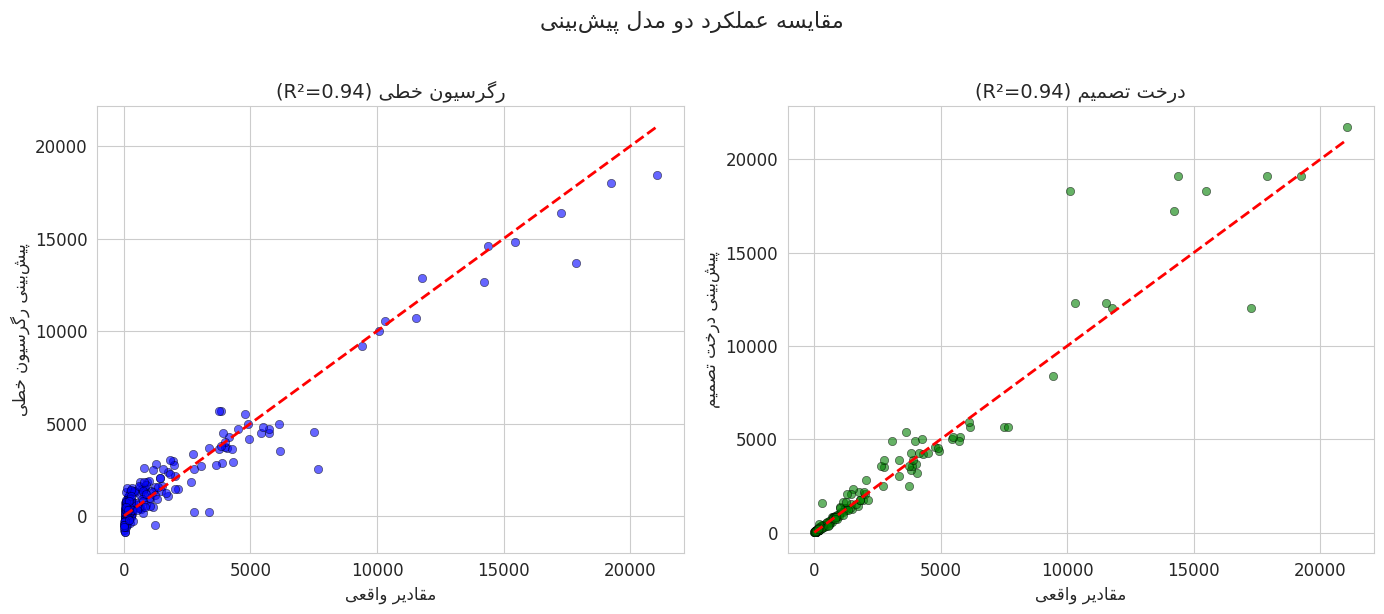

<Figure size 640x480 with 0 Axes>

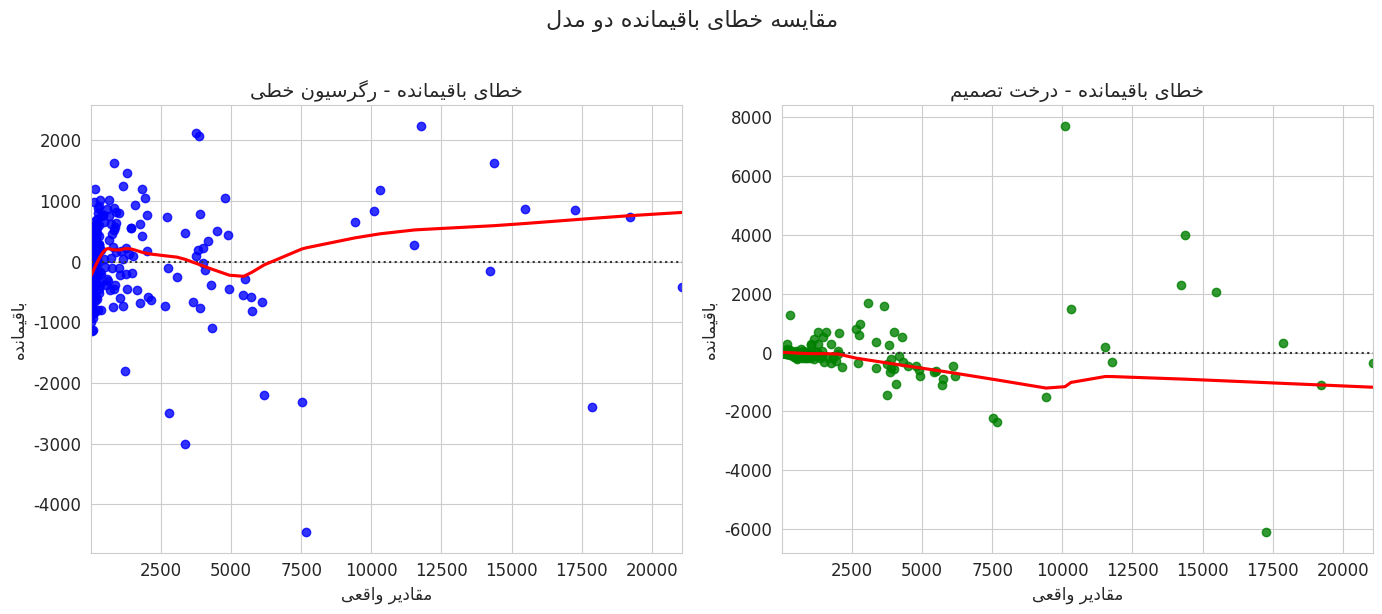

:ﺎﻫﻝﺪﻣ ﺩﺮﮑﻠﻤﻋ ﯼﺩﺪﻋ ﻪﺴﯾﺎﻘﻣ
ﺩﺭﺧﺖ ﺗﺼﻤﯿﻢ  ﺭﮔﺮﺳﯿﻮﻥ ﺧﻄﯽ  ﻣﻌﯿﺎﺭ
RMSE   916.358149  920.454696 
   R²     0.935905    0.935331
  MAE   628.592283  319.138092
 MAPE     2.880463    0.204050


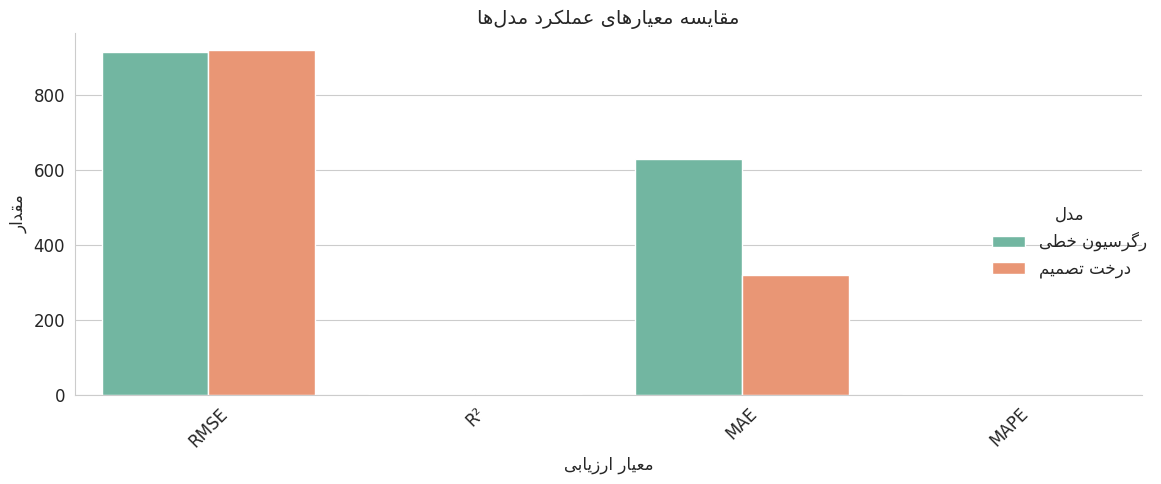

In [233]:
# Required Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Chart appearance settings (assuming font and reshape_farsi are already configured)
sns.set_style("whitegrid")

# 1. Visual comparison of predictions
plt.figure(figsize=(14, 6))

# Linear Regression Model
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr, color='blue', alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel(reshape_farsi('مقادیر واقعی'), fontsize=12)
plt.ylabel(reshape_farsi('پیش‌بینی رگرسیون خطی'), fontsize=12)
plt.title(reshape_farsi('رگرسیون خطی (R²={:.2f})'.format(r2_score(y_test, y_pred_lr))), fontsize=14)

# Decision Tree Model
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_dt, color='green', alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel(reshape_farsi('مقادیر واقعی'), fontsize=12)
plt.ylabel(reshape_farsi('پیش‌بینی درخت تصمیم'), fontsize=12)
plt.title(reshape_farsi('درخت تصمیم (R²={:.2f})'.format(r2_score(y_test, y_pred_dt))), fontsize=14)

plt.suptitle(reshape_farsi('مقایسه عملکرد دو مدل پیش‌بینی'), y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

plt.subplots_adjust(wspace=0.3)

# 2. Residual error comparison
plt.figure(figsize=(14, 6))

# Linear Regression residuals
plt.subplot(1, 2, 1)
sns.residplot(x=y_test, y=y_pred_lr, lowess=True, color='blue', line_kws={'color': 'red'})
plt.xlabel(reshape_farsi('مقادیر واقعی'), fontsize=12)
plt.ylabel(reshape_farsi('باقیمانده'), fontsize=12)
plt.title(reshape_farsi('خطای باقیمانده - رگرسیون خطی'), fontsize=14)

# Decision Tree residuals
plt.subplot(1, 2, 2)
sns.residplot(x=y_test, y=y_pred_dt, lowess=True, color='green', line_kws={'color': 'red'})
plt.xlabel(reshape_farsi('مقادیر واقعی'), fontsize=12)
plt.ylabel(reshape_farsi('باقیمانده'), fontsize=12)
plt.title(reshape_farsi('خطای باقیمانده - درخت تصمیم'), fontsize=14)

plt.suptitle(reshape_farsi('مقایسه خطای باقیمانده دو مدل'), y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# 3. Numerical comparison of metrics
metrics_comparison = pd.DataFrame({
    reshape_farsi('معیار'): [reshape_farsi('RMSE'), reshape_farsi('R²'), reshape_farsi('MAE'), reshape_farsi('MAPE')],
    reshape_farsi('رگرسیون خطی'): [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        r2_score(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_percentage_error(y_test, y_pred_lr)
    ],
    reshape_farsi('درخت تصمیم'): [
        np.sqrt(mean_squared_error(y_test, y_pred_dt)),
        r2_score(y_test, y_pred_dt),
        mean_absolute_error(y_test, y_pred_dt),
        mean_absolute_percentage_error(y_test, y_pred_dt)
    ]
})

print(reshape_farsi("مقایسه عددی عملکرد مدل‌ها:"))
print(reshape_farsi(metrics_comparison.to_string(index=False)))

# 4. Bar chart for metric comparison
melted = metrics_comparison.melt(id_vars=reshape_farsi('معیار'), var_name=reshape_farsi('مدل'), value_name=reshape_farsi('مقدار'))

sns.catplot(
    data=melted,
    x=reshape_farsi('معیار'),
    y=reshape_farsi('مقدار'),
    hue=reshape_farsi('مدل'),
    kind='bar',
    height=5,
    aspect=2,
    palette='Set2'
)

plt.title(reshape_farsi('مقایسه معیارهای عملکرد مدل‌ها'), fontsize=14)
plt.xlabel(reshape_farsi('معیار ارزیابی'), fontsize=12)
plt.ylabel(reshape_farsi('مقدار'), fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
